# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : Machine Learning
## Topic   : KMeans-Driver data

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('driver-data.csv')

In [19]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [33]:
df.shape

(4000, 3)

In [20]:
final_df = df.drop('id',axis=1)

In [21]:
final_df

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [22]:
from sklearn.cluster import KMeans

In [24]:
result = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(final_df)``
    result.append(kmeans.inertia_)


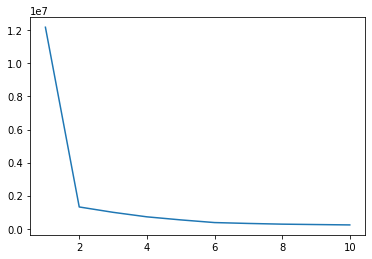

In [26]:
plt.plot(range(1,11),result)

In [37]:
model = KMeans(n_clusters=4)

In [38]:
model.fit(final_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
model.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [40]:
type(model.labels_)

numpy.ndarray

In [41]:
unique,counts = np.unique(model.labels_,return_counts=True)

In [42]:
print(dict(zip(unique,counts)))

{0: 2775, 1: 696, 2: 104, 3: 425}


In [43]:
final_df['cluster'] = model.labels_

In [44]:
final_df

,mean_dist_day,mean_over_speed_perc,cluster
0,71.24,28,3
1,52.53,25,3
2,64.54,27,3
3,55.69,22,3
4,54.58,25,3
...,...,...,...
3995,160.04,10,1
3996,176.17,5,1
3997,170.91,12,1
3998,176.14,5,1


<AxesSubplot:xlabel='mean_dist_day', ylabel='mean_over_speed_perc'>

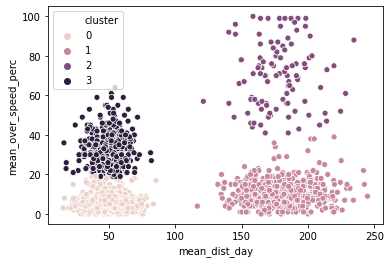

In [45]:
sns.scatterplot('mean_dist_day','mean_over_speed_perc',data=final_df,hue='cluster')